**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial.distance import cosine, euclidean, correlation
from scipy.spatial.distance import cdist
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        if self.algorithm == 'brute':
            ind = np.argpartition(cdist(X, self.X, metric=self.metric), self.n_neighbors, axis=1)[:,:self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            tree = KDTree(self.X, leaf_size=2)
            _, ind = tree.query(X, k=self.n_neighbors)        
        
        def classify(k_nearest_args):
            return np.argmax(np.bincount(self.y[k_nearest_args]))
        
        prediction = np.apply_along_axis(classify, 1, ind)
        return prediction
        

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target, random_state=110)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ))<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 1.17 ms, sys: 0 ns, total: 1.17 ms
Wall time: 965 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 6.91 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 1.86 ms, sys: 504 µs, total: 2.37 ms
Wall time: 1.7 ms


array([0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.04 ms, sys: 146 µs, total: 1.18 ms
Wall time: 916 µs


array([0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 905 µs, sys: 0 ns, total: 905 µs
Wall time: 743 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 2.92 ms, total: 2.92 ms
Wall time: 2.1 ms


array([1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.18 ms, sys: 0 ns, total: 1.18 ms
Wall time: 1.21 ms


array([1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=777)
vectorized_data = vectorizer.fit_transform(data).toarray()

In [22]:
vectorized_data.shape

(11314, 777)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import KFold, cross_val_score
import matplotlib
kf = KFold(3)
for train_index, test_index in kf.split(vectorized_data):
    X_train, X_test = vectorized_data[train_index], vectorized_data[test_index]
    y_train, y_test = target[train_index], target[test_index]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def find_optimal_k(X, y, metric='euclidean'):
    acc = np.empty(10)
    for i in range(10):
        estimator = MyKNeighborsClassifier(i+1, 'brute', metric)
        acc[i] = np.mean(cross_val_score(estimator, X, y, scoring='accuracy', cv=3))
        print('{}: {:.5}'.format(i+1, acc[i]))
    print('=========End Of {}========'.format(metric))
    return acc
euc_acc = find_optimal_k(vectorized_data, target, 'euclidean')
cosine_acc = find_optimal_k(vectorized_data, target, 'cosine')

1: 0.17509
2: 0.16201
3: 0.16908
4: 0.17156
5: 0.16882
6: 0.17235
7: 0.17341
8: 0.17624
9: 0.17819
10: 0.17969
=========End Of euclidean========
1: 0.242
2: 0.23573
3: 0.23334
4: 0.23184
5: 0.2344
6: 0.23608
7: 0.23555
8: 0.24059
9: 0.23979
10: 0.24032
=========End Of cosine========


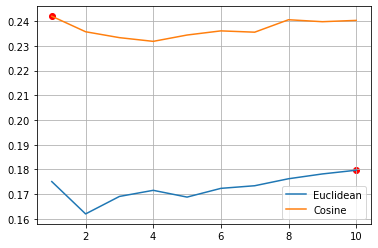

In [25]:
plt.plot(np.arange(1, 11), euc_acc)
plt.plot(np.arange(1, 11), cosine_acc)
plt.scatter(euc_acc.argmax() + 1, euc_acc[euc_acc.argmax()],c = 'r')
plt.scatter(cosine_acc.argmax() + 1, cosine_acc[cosine_acc.argmax()], c = 'r')
plt.legend(['Euclidean', 'Cosine'])
plt.grid()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

**Ответ:** Точность улучшается в обоих случаях

Сравните модели, выберите лучшую.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=777)
vectorized_data = vectorizer.fit_transform(data).toarray()

In [27]:
vectorized_data.shape

(11314, 777)

In [28]:
euc_acc_tf = find_optimal_k(vectorized_data, target, 'euclidean')
cosine_acc_tf = find_optimal_k(vectorized_data, target, 'cosine')

1: 0.28434
2: 0.23352
3: 0.23944
4: 0.23352
5: 0.23078
6: 0.22786
7: 0.22671
8: 0.22362
9: 0.22211
10: 0.22096
=========End Of euclidean========
1: 0.38377
2: 0.36919
3: 0.37803
4: 0.38413
5: 0.38581
6: 0.39217
7: 0.39429
8: 0.39951
9: 0.40065
10: 0.40092
=========End Of cosine========


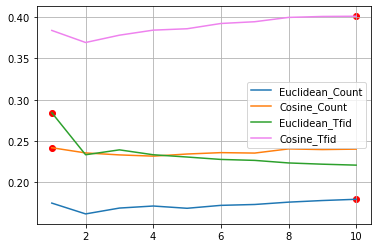

In [29]:
x = np.arange(1, 11)

plt.plot(x, euc_acc, label='Euclidean_Count')
plt.scatter(euc_acc.argmax() + 1, euc_acc.max(),c = 'r')

plt.plot(x, cosine_acc, label='Cosine_Count')
plt.scatter(cosine_acc.argmax() + 1, cosine_acc.max(), c = 'r')

plt.plot(x, euc_acc_tf, label='Euclidean_Tfid')
plt.scatter(euc_acc_tf.argmax() + 1, euc_acc_tf.max(),c = 'r')

plt.plot(x, cosine_acc_tf, c='violet', label='Cosine_Tfid')
plt.scatter(cosine_acc_tf.argmax() + 1, cosine_acc_tf.max(), c = 'r')

plt.legend()
plt.grid()

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [30]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [31]:
test_data = newsgroups['data']
test_target = newsgroups['target']
test_vectorizer = TfidfVectorizer(vocabulary=vectorizer.get_feature_names())
test_vectorized_data = test_vectorizer.fit_transform(test_data).toarray()

In [32]:
my_clf = MyKNeighborsClassifier(10, 'brute', 'cosine')
my_clf.fit(vectorized_data, target)

In [33]:
my_clf_pred = my_clf.predict(test_vectorized_data)
print('Accuracy on test: {:.4}'.format((my_clf_pred == test_target).sum() / test_target.shape[0]))

Accuracy on test: 0.3583


Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

**Ответ:** Точность немного меньше. Это вероятнее всего связано с тем, что данные в тестовом наборе просто отличаются от данных в обучении и на валидации (соотвественно немного отличается выбор основных признаков). Ну или просто тестовый набор содержит больше хитрых примеров